**Before creating any model , it is always useful to have basic information about the dataset.**
## About MNIST Data:
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

In [56]:
from google.colab import drive

In [57]:
drive.mount('/content/drive')

Mounted at /content/drive


I am using google colab because its good as we can use GPU facilities provided by Google due to which our code runs faster than CPU.
Please go thru readme file , i have mentioned infomation regarding same over there like how to connect, how to use and some important links for same.

First select TensorFlow version2 in google colab

In [58]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [59]:
## Initialize the random number generator and supress warnings
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [60]:
## Lets load the dataset which is already present in Tensorflow keras.
from tensorflow.keras.datasets import mnist

In [61]:
## load_data of MNIST will return tuples in below format and we are getting it same
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [62]:
## print the shape of data
print("X_train shape is {}".format(X_train.shape))
print("y_train shape is {}".format(y_train.shape))
print("X_test shape is {}".format(X_test.shape))
print("y_test shape is {}".format(y_test.shape))
print("X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels of their actual value i.e from 0 to 9.")

X_train shape is (60000, 28, 28)
y_train shape is (60000,)
X_test shape is (10000, 28, 28)
y_test shape is (10000,)
X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels of their actual value i.e from 0 to 9.


Label is : 5


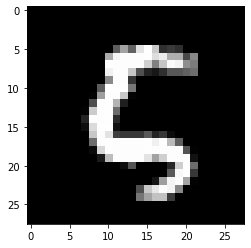

In [64]:
## Lets visualize the sample
import matplotlib.pyplot as plt
print("Label is : {}".format(y_train[2000]))
plt.imshow(X_train[2000], cmap = "gray")

### Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [65]:
# Reshape the data into compatible shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [66]:
# Checking the shape after making it compatible for input shape required for sequential model
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [67]:
X_train = X_train.astype("float")
X_test = X_test.astype("float")

X_train = X_train/255
X_test = X_test/255

In [69]:
## checking min and max value after normalization
print("X_train minimum value is : {}". format(X_train.min()))
print("X_train maximum value is : {}". format(X_train.max()))
print("")
print("X_test minimum value is : {}". format(X_test.min()))
print("X_test maximum value is : {}". format(X_test.max()))

X_train minimum value is : 0.0
X_train maximum value is : 1.0

X_test minimum value is : 0.0
X_test maximum value is : 1.0


We can see values are normalized as min and max lies between 0 to 1

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [70]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [71]:
# Loading the libraries for CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [72]:
# Creating the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))


### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [73]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
model.fit(x = X_train, y= y_train, batch_size=32, epochs = 10, verbose=1, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1114 - accuracy: 0.9654 - val_loss: 0.0445 - val_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0429 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0553 - val_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0697 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0518 - val_accuracy:

In [74]:
# Final loss abd accuracy
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9870


[0.06378432363271713, 0.9869999885559082]

 **Vanilla CNN + Pooling + Dropout**

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [75]:
# Importing the pooling and Droput layer
from tensorflow.keras.layers import Dropout, MaxPooling2D

In [76]:
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- Use EarlyStopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [77]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1255 - accuracy: 0.9617 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0336 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0398 - val_accuracy: 0.9880


In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0398 - accuracy: 0.9880


[0.039759501814842224, 0.9879999756813049]

Loss decreased by bit and accuracy increases after using Dropout and Pooling even our model only runs for 3 epochs as we used callback. Thus good performance and parameter use we can say

**Lets Visualize the result**

Softmax Outputs:-> [[1.4984955e-07 6.1629790e-09 8.5153429e-12 9.2951723e-12 1.9463144e-10
  3.3782806e-07 9.9999952e-01 5.1210549e-13 9.8443080e-11 2.8525125e-11]]
--> Predicted label: 6
1.0


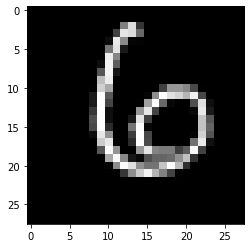

In [80]:
plt.imshow(X_test[100].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[100].reshape(1, 28, 28, 1))
print("Softmax Outputs:->", y_pred)
print("--> Predicted label:", y_pred.argmax())
print(y_pred.sum())

Model is performing very good as it is predicting labels pretty well .  Same its accuracy and loss value also says... 